## App to get literature from multiple years

#### work in progress

example of search term: (stroke[Title/Abstract]) AND ("2017/01/01"[Date - Publication] : "3000"[Date - Publication])

build new search terms here: https://www.ncbi.nlm.nih.gov/pubmed/advanced

In [1]:
import scraper as sc
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
retmax = 200
email = 'chris.dinant@gmail.com'

In [3]:
def make_query(term, year):
    return '({}[Title/Abstract]) AND \
({}[Date - Publication])'\
.format(term, year)

In [4]:
make_query('parkinson\'s', 2016)

"(parkinson's[Title/Abstract]) AND (2016[Date - Publication])"

In [ ]:
for i, n in enumerate(range(2000,2019,1)):
    new_keys = range(i*retmax, (i+1)*retmax)
    query = make_query('parkinson\'s', n)
    ap = sc.ArticleParser(retmax, email)
    raw_dict = ap.find_term(query)
    articles = ap.fetch_info(raw_dict['IdList'])
    if i == 0:
        parsed_dict = ap.parse_info(articles)
    else:
        n_parsed_dict = ap.parse_info(articles)
        for k in n_parsed_dict.keys():
            parsed_dict[new_keys[k]] = n_parsed_dict[k] # add articles from the next year behind the current  


In [ ]:
df = pd.DataFrame.from_dict(parsed_dict, orient = 'index')
df.date = pd.to_datetime(df.date)
df = df[df.abstract != ''].sort_values(by='date', 
                                       ascending=0)\
                          .reset_index(drop=True)
df.head()

In [7]:
df.to_csv('parkinson_2000tonow.csv')

In [8]:
# top 20 journals from each year, 1999 to 2017
jr_dict = defaultdict(list)
for year in range(1999,2018):
    scimago = pd.read_csv('scimago/scimagojr {}  \
Subject Category - Neurology (clinical).csv'.format(year), sep=';')
    jr_dict[year] = scimago.Title[:20].tolist()
        

In [9]:
jr_dict[1999]

['Annals of Neurology',
 'Brain Research Reviews',
 'Brain',
 'Critical Reviews in Neurobiology',
 'Journal of Cerebral Blood Flow and Metabolism',
 'Human Brain Mapping',
 'Stroke',
 'Journal of Neuropathology and Experimental Neurology',
 'Neurology',
 'Brain Pathology',
 'Journal of Neurosurgery',
 'International Review of Neurobiology',
 'JAMA Neurology',
 'Neurosurgery',
 'Pain',
 'Neurobiology of Aging',
 'Journal of Neuropsychiatry and Clinical Neurosciences',
 'American Journal of Neuroradiology',
 'Journal of Neuroimmunology',
 'Epilepsia']

In [10]:
gen_top_jr = ['Science', 
            'Nature', 
            'Cell', 
            'Nature Medicine', 
            'New England Journal of Medicine']

In [11]:
fractions = defaultdict(int)

In [12]:
for key, value in jr_dict.items():
    mask = (df.date > str(key))&(df.date < str(key+1))
    fractions[key] = df.loc[mask]\
    ['published in'].apply(lambda x: x in value).sum()\
    + df.loc[mask]\
    ['published in'].apply(lambda x: x in gen_top_jr).sum()

__This should include newer literature, compared with the latest scimago data__

In [13]:
fractions.keys()

dict_keys([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

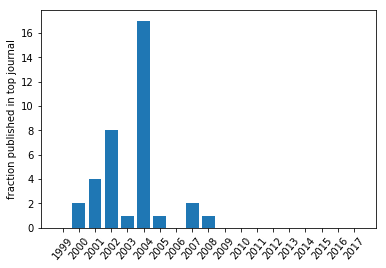

In [14]:
plt.bar(range(len(fractions)), list(fractions.values()), align='center')
plt.xticks(range(len(fractions)), list(fractions.keys()), rotation = 50)
plt.ylabel('fraction published in top journal')
plt.show()